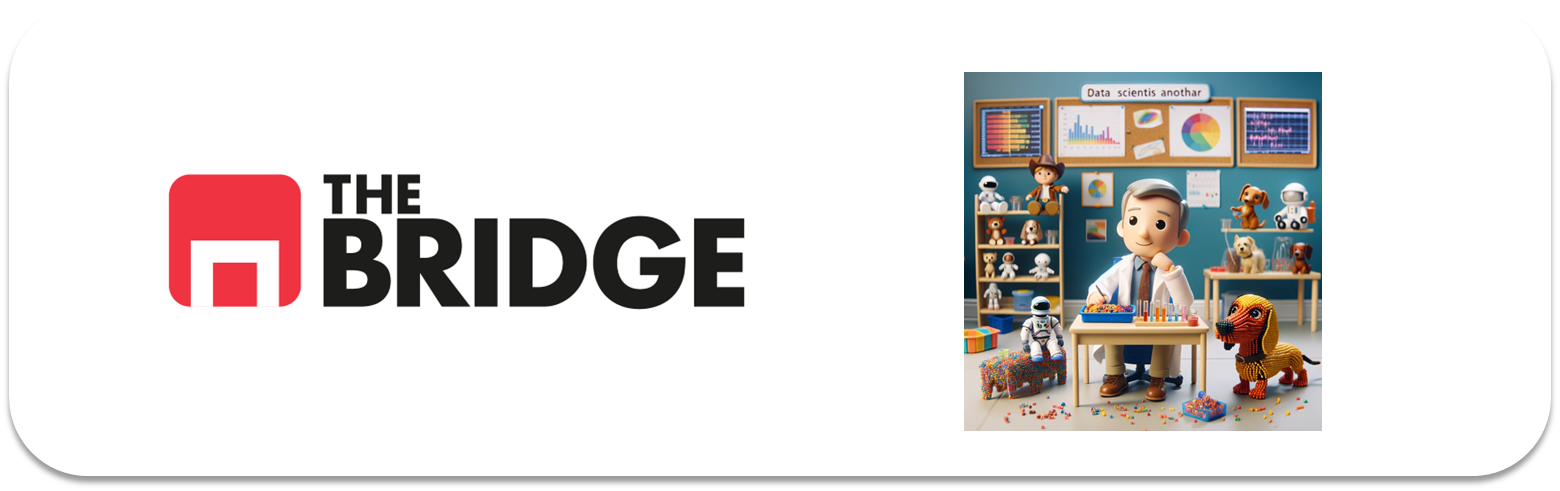

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [104]:

sns.__version__


'0.13.2'

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
sns.get_dataset_names()
df_titanic2 = sns.load_dataset("titanic")

### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [4]:

df_titanic = df_titanic2.copy()


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [31]:
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,7.2500,Southhampton,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,71.2833,Cherbourg,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,7.9250,Southhampton,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,53.1000,Southhampton,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,8.0500,Southhampton,Third,man,True,Southampton,no,True
5,0,3,male,29.699118,0,8.4583,Queenstown,Third,man,True,Queenstown,no,True
6,0,1,male,54.000000,0,51.8625,Southhampton,First,man,True,Southampton,no,True
7,0,3,male,2.000000,3,21.0750,Southhampton,Third,child,False,Southampton,no,False
8,1,3,female,27.000000,0,11.1333,Southhampton,Third,woman,False,Southampton,yes,False
9,1,2,female,14.000000,1,30.0708,Cherbourg,Second,child,False,Cherbourg,yes,False


In [32]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     891 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  embark_town  891 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(5)
memory usage: 72.5+ KB


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [6]:
df_titanic.isnull().mean()*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [7]:
df_titanic.drop(columns = ["parch"], inplace = True)


In [8]:
df_titanic.drop(columns = ["deck"], inplace = True)

In [9]:
mean_age = df_titanic['age'].mean()
df_titanic['age'] = df_titanic['age'].fillna(mean_age)

In [10]:
mode_embarked = df_titanic["embarked"].mode()[0]
df_titanic['embarked'] = df_titanic['embarked'].fillna(mode_embarked)



In [11]:
mode_embark_town = df_titanic["embark_town"].mode()[0]
df_titanic['embark_town'] = df_titanic['embark_town'].fillna(mode_embark_town)

In [12]:
df_titanic.isnull().mean()*100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| Survived     | Did not survive = 0, survived = 1|
| pclass     | What class did they board with |
| sex    | Gender of passenger |
| age     | Age of passenger |
| sibsp    | Number of passengers that traveled(in the manifest)|
| Fare   | Amount paid |
| Embarked     | City where they embarked, by initials|
| Class     | Class passengers where in  |
| Who     | Adult man/woman/child |
| Adult_male  | Yes or no if passenger had adult male |
| Embark_town    | Town where they embarked |
| Alive   | Did they survive, yes or no |
| Alone    | Where this passengers alone |

### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [13]:

df_titanic["embarked"] =  df_titanic["embarked"].replace("C", "Cherbourg")
df_titanic["embarked"] =  df_titanic["embarked"].replace("Q", "Queenstown")
df_titanic["embarked"] =  df_titanic["embarked"].replace("S", "Southhampton")


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [14]:
df_tipificacion = pd.DataFrame([df_titanic.nunique(), df_titanic.nunique()/len(df_titanic) * 100, df_titanic.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion["Clasificada_como"] = "Categorica" 
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
survived,2,0.224467,int64,Binaria
pclass,3,0.3367,int64,Categorica
sex,2,0.224467,object,Binaria
age,89,9.988777,float64,Numerica Discreta
sibsp,7,0.785634,int64,Categorica
fare,248,27.833895,float64,Numerica Discreta
embarked,3,0.3367,object,Categorica
class,3,0.3367,category,Categorica
who,3,0.3367,object,Categorica
adult_male,2,0.224467,bool,Binaria


In [15]:
df_titanic.describe().loc["50%"]

survived     0.000000
pclass       3.000000
age         29.699118
sibsp        0.000000
fare        14.454200
Name: 50%, dtype: float64

In [16]:
df_titanic.describe().loc["mean"]

survived     0.383838
pclass       2.308642
age         29.699118
sibsp        0.523008
fare        32.204208
Name: mean, dtype: float64

### #2.1 Categóricas

In [17]:

def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


In [18]:
variables_categoricas = [
    "embarked",
    "class",
    "who",
    "alone",
    "survived"

]
'''No aplico priorización porque no son muchas variables'''

df_titanic[variables_categoricas].mode().T

,0
embarked,Southhampton
class,Third
who,man
alone,True
survived,0


In [19]:
'''Frencuencia absoluta'''
for catego in variables_categoricas:
    print(f"Para {catego}")
    print(df_titanic[catego].value_counts())
    print("\n" *2)


Para embarked
embarked
Southhampton    646
Cherbourg       168
Queenstown       77
Name: count, dtype: int64



Para class
class
Third     491
First     216
Second    184
Name: count, dtype: int64



Para who
who
man      537
woman    271
child     83
Name: count, dtype: int64



Para alone
alone
True     537
False    354
Name: count, dtype: int64



Para survived
survived
0    549
1    342
Name: count, dtype: int64





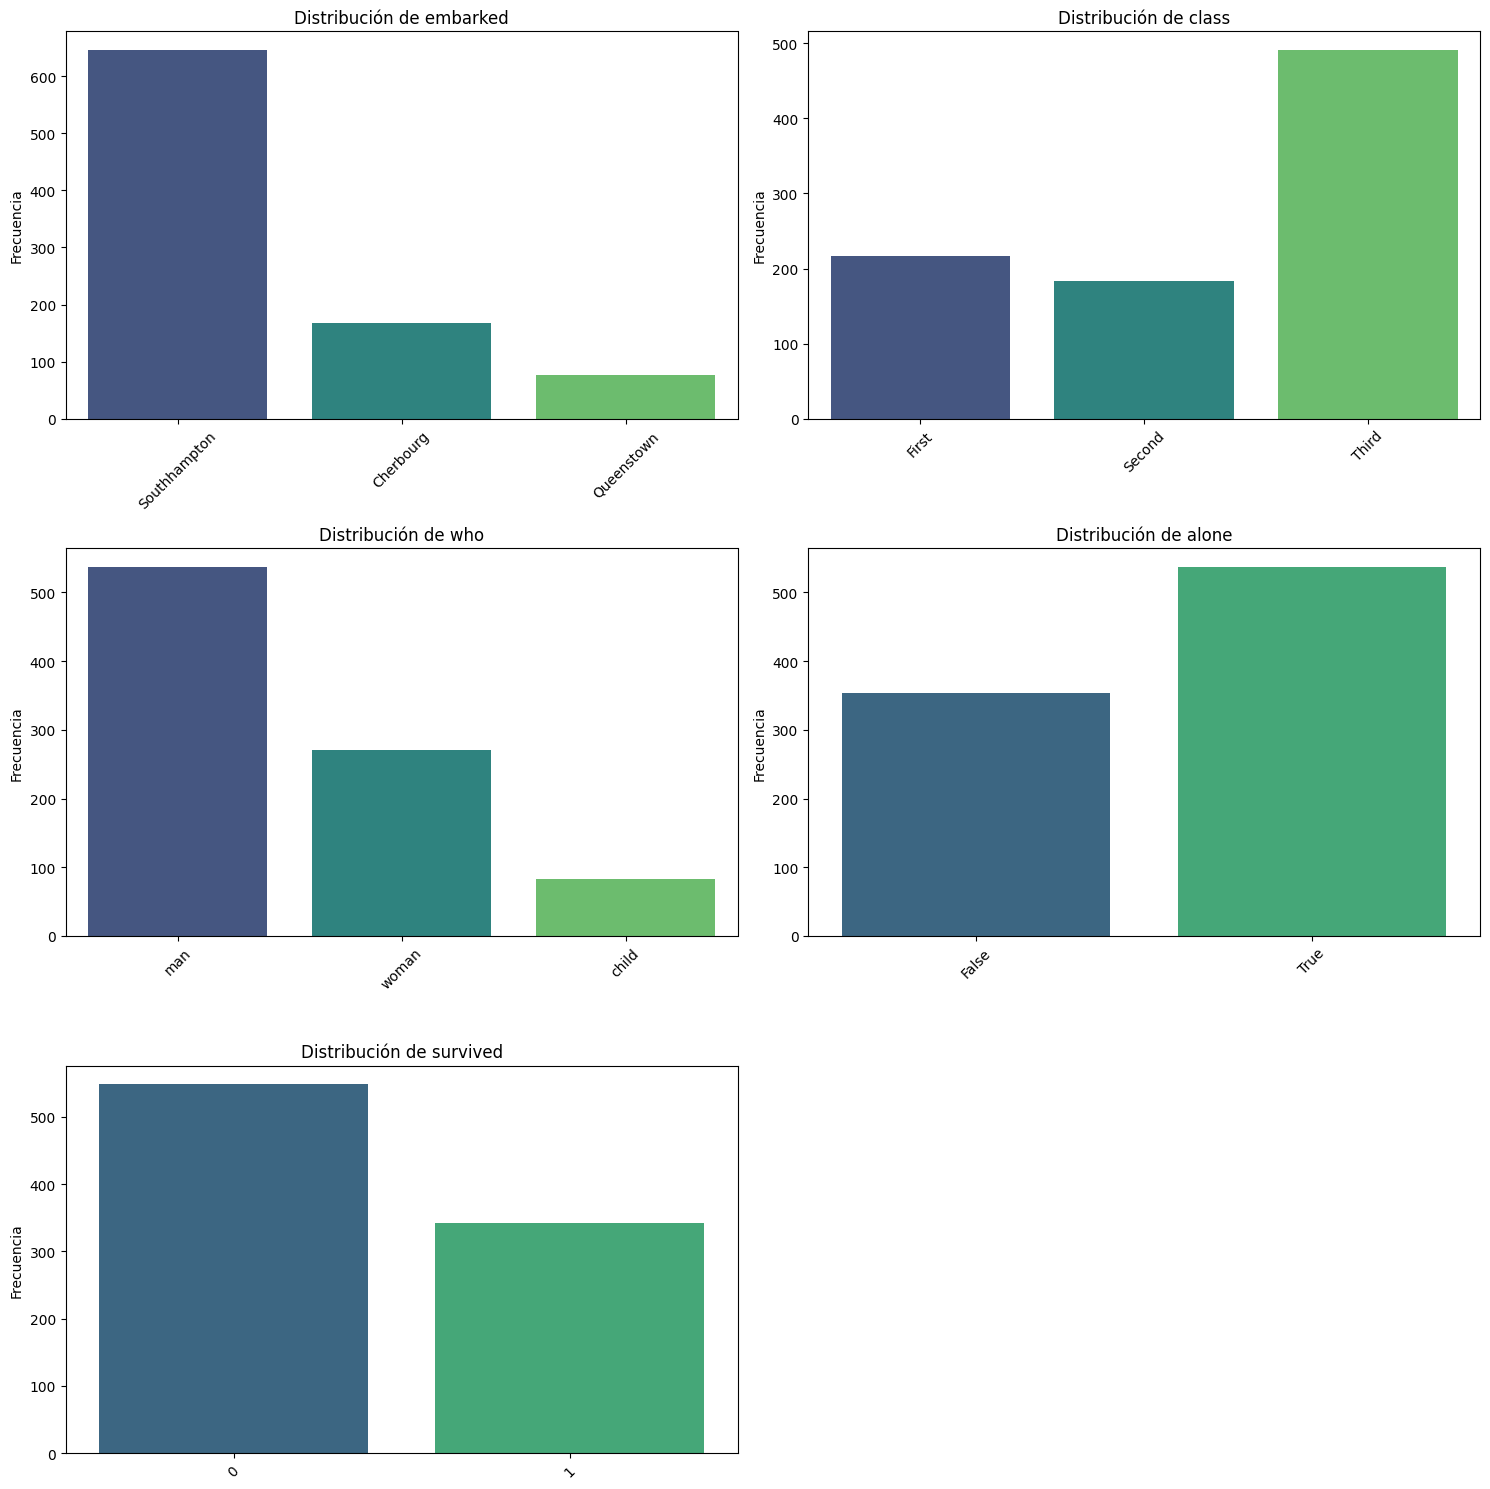

In [20]:
pinta_distribucion_categoricas(df_titanic, variables_categoricas)

In [21]:
'''Frecuencia relativa '''
for catego in variables_categoricas:
    print(f"Para {catego}")
    print(df_titanic[catego].value_counts()/len(df_titanic)*100)
    print("\n" *2)

Para embarked
embarked
Southhampton    72.502806
Cherbourg       18.855219
Queenstown       8.641975
Name: count, dtype: float64



Para class
class
Third     55.106622
First     24.242424
Second    20.650954
Name: count, dtype: float64



Para who
who
man      60.269360
woman    30.415264
child     9.315376
Name: count, dtype: float64



Para alone
alone
True     60.26936
False    39.73064
Name: count, dtype: float64



Para survived
survived
0    61.616162
1    38.383838
Name: count, dtype: float64





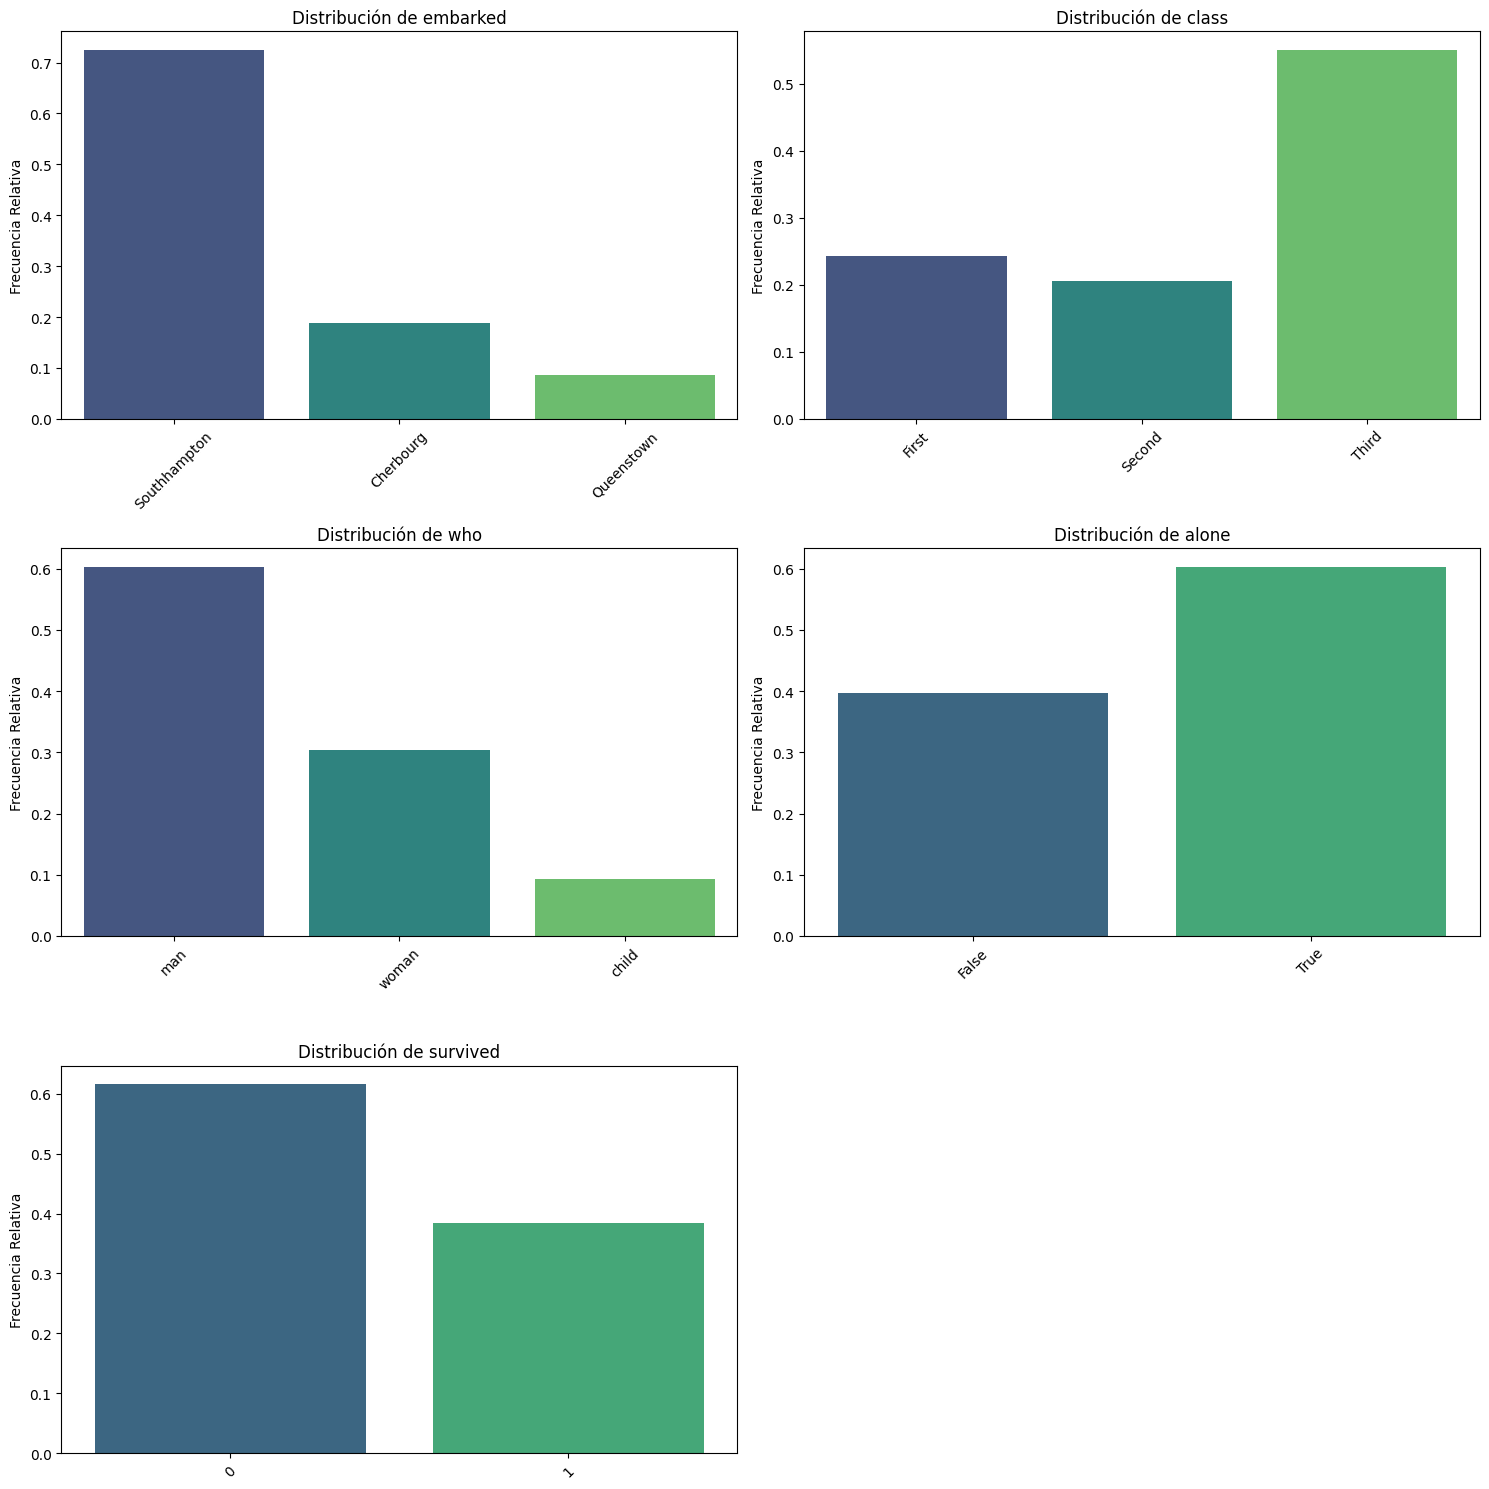

In [22]:
pinta_distribucion_categoricas(df_titanic, variables_categoricas, relativa = True)

In [24]:

def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [47]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [26]:
df_titanic.describe()

,survived,pclass,age,sibsp,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,32.204208
std,0.486592,0.836071,13.002015,1.102743,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,512.329200


In [27]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

<Axes: >

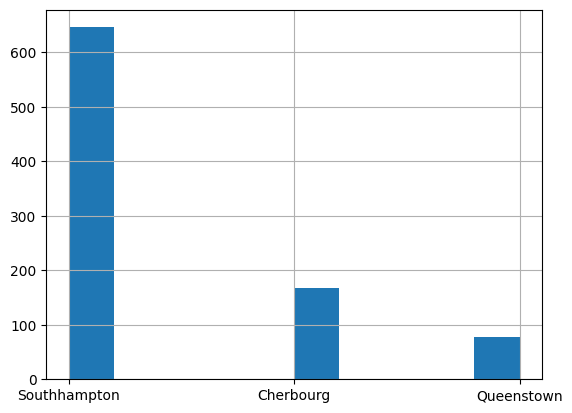

In [62]:
df_titanic["embarked"].hist()

<Axes: >

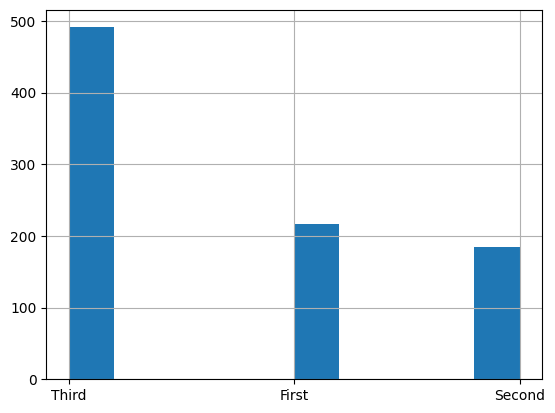

In [64]:
df_titanic["class"].hist()

<Axes: >

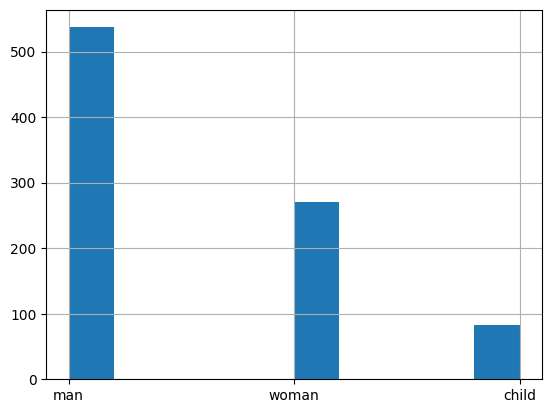

In [ ]:
df_titanic["who"].hist() #muy similar a la distribución

<Axes: >

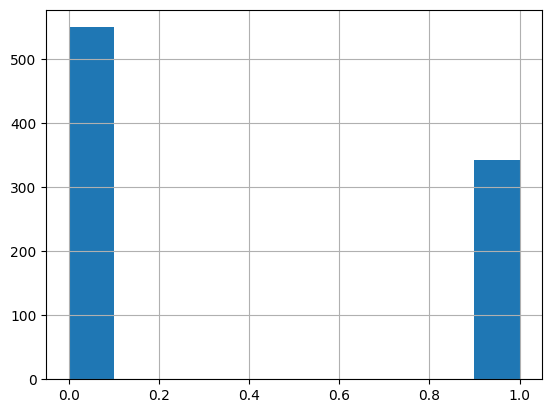

In [75]:
df_titanic["survived"].hist()

### #2.2 Numéricas

In [91]:
variables_numericas = [
    "age",
    "fare"
    ]
'''No aplico priorización porque no son muchas variables'''

df_titanic[variables_numericas].mode().T

,0
age,29.699118
fare,8.050000


In [ ]:
'''Frecuencia absoluta '''

for catego in variables_numericas:
    print(f"Para {catego}")
    print(df_titanic[catego].value_counts())
    print("\n" *2)

Para age
age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64



Para fare
fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64





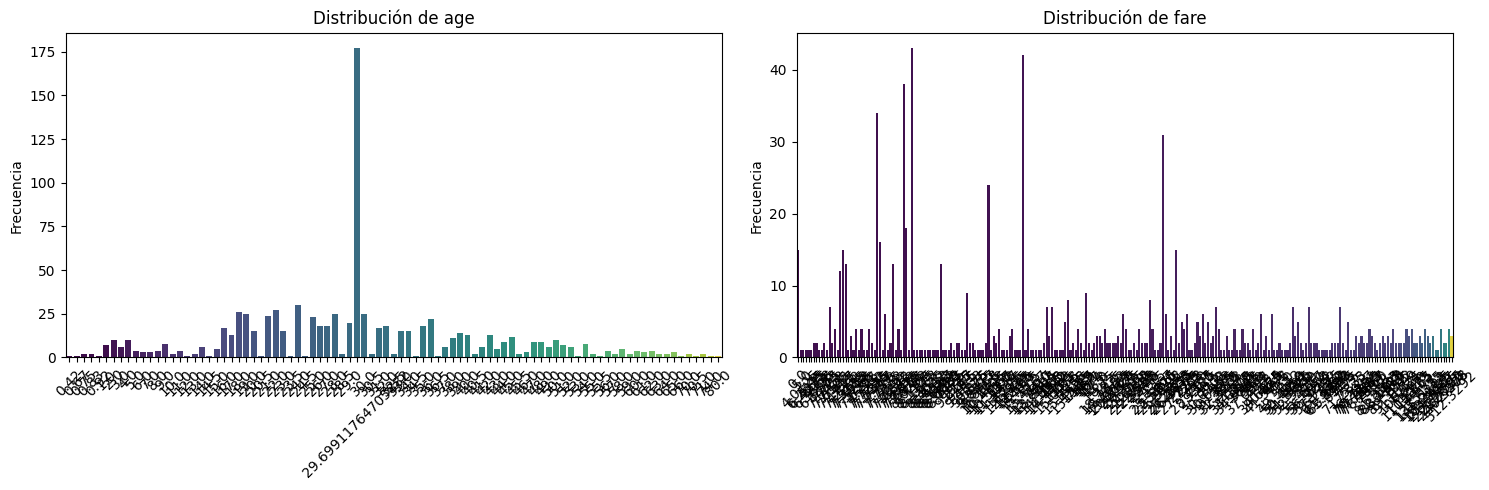

In [93]:
pinta_distribucion_categoricas(df_titanic, variables_numericas)

In [98]:
'''Frecuencia relativa '''
for catego in variables_numericas:
    print(f"Para {catego}")
    print(df_titanic[catego].value_counts()/len(df_titanic)*100)
    print("\n" *2)

Para age
age
29.699118    19.865320
24.000000     3.367003
22.000000     3.030303
18.000000     2.918070
28.000000     2.805836
               ...    
36.500000     0.112233
55.500000     0.112233
0.920000      0.112233
23.500000     0.112233
74.000000     0.112233
Name: count, Length: 89, dtype: float64



Para fare
fare
8.0500     4.826038
13.0000    4.713805
7.8958     4.264871
7.7500     3.815937
26.0000    3.479237
             ...   
35.0000    0.112233
28.5000    0.112233
6.2375     0.112233
14.0000    0.112233
10.5167    0.112233
Name: count, Length: 248, dtype: float64





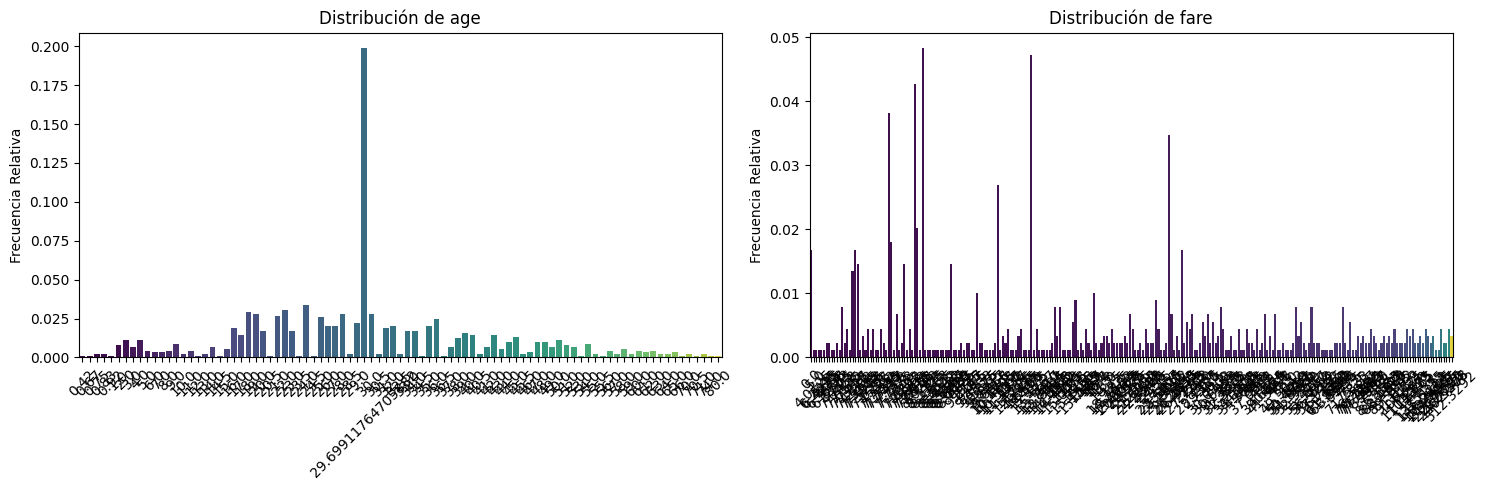

In [101]:
pinta_distribucion_categoricas(df_titanic, variables_numericas, relativa = True)

In [34]:
get_IQR(df_titanic,"age")

np.float64(13.0)

In [35]:
get_IQR(df_titanic,"fare")

np.float64(23.0896)

In [ ]:
df_titanic["age"].describe() #Algo dispersa del mean, IQR son 13 y ,mean es 29, sera una variable dispersa

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [ ]:
df_titanic["fare"].describe()#Algo dispersa del mean, IQR son 23 y ,mean es 32, sera una variable dispersa. Ademas Std son 49

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [42]:
columnas_numericas = [
    "age",
    "fare"
    ]
columnas_numericas = df_titanic.describe().T.index.to_list()
print(columnas_numericas)

['survived', 'pclass', 'age', 'sibsp', 'fare']


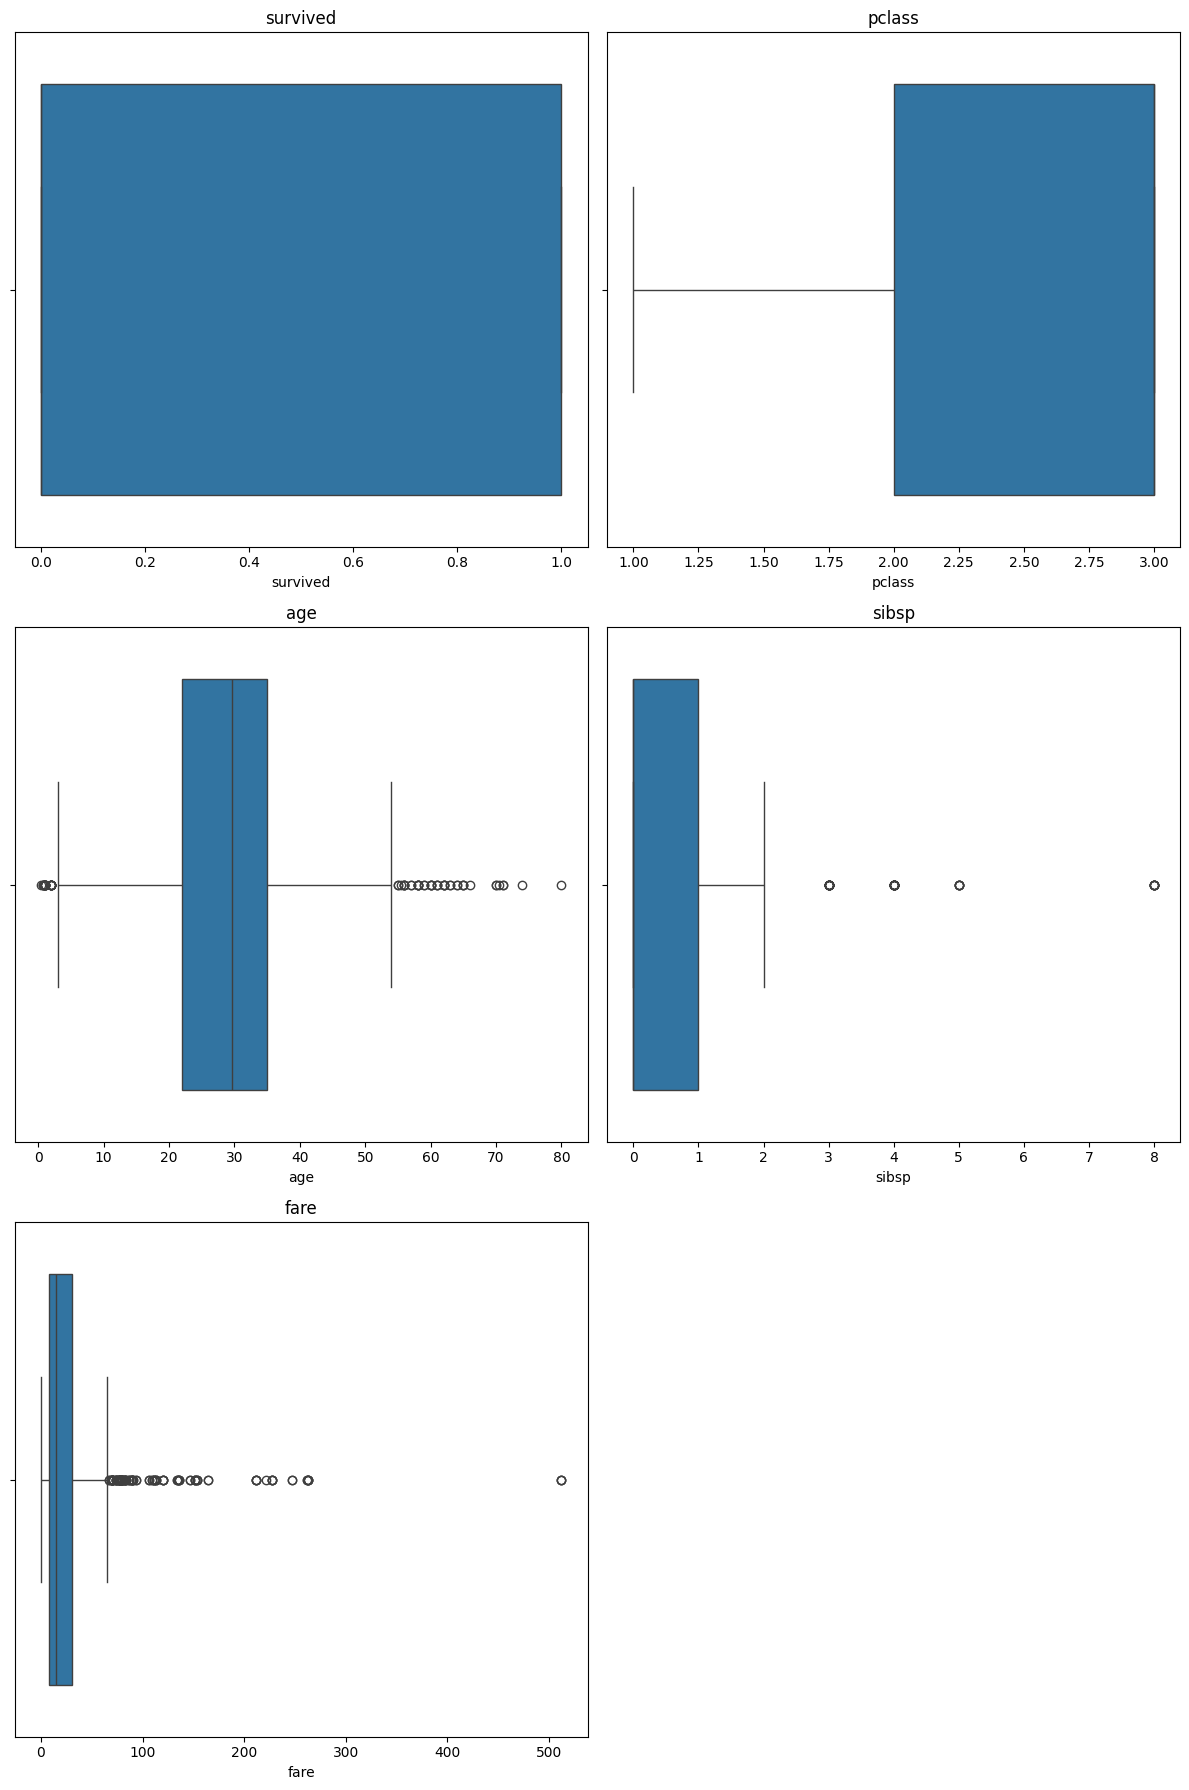

In [39]:
plot_multiple_boxplots(df_titanic, columnas_numericas)

In [48]:
plot_boxplot_grouped(df_titanic, "age", "fare")

In [49]:
df_titanic.describe().loc["max"] - df_titanic.describe().loc["min"]

survived      1.0000
pclass        2.0000
age          79.5800
sibsp         8.0000
fare        512.3292
dtype: float64

In [50]:
df_titanic.describe().loc[["std", "mean"]].T

,std,mean
survived,0.486592,0.383838
pclass,0.836071,2.308642
age,13.002015,29.699118
sibsp,1.102743,0.523008
fare,49.693429,32.204208


In [51]:
def variabilidad(df):
    df_var = df.describe().loc[["std", "mean"]].T
    df_var["CV"] = df_var["std"]/df_var["mean"]
    return df_var

In [ ]:
variabilidad(df_titanic) #Alta variabilidad en age y fare ( no considero las demás)

,std,mean,CV
survived,0.486592,0.383838,1.267701
pclass,0.836071,2.308642,0.362149
age,13.002015,29.699118,0.437791
sibsp,1.102743,0.523008,2.108464
fare,49.693429,32.204208,1.543073


<Axes: >

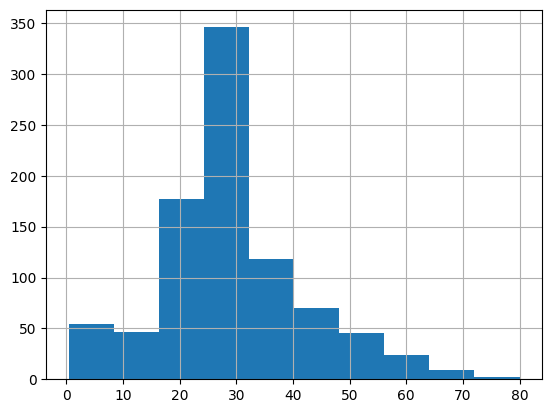

In [59]:
df_titanic["age"].hist()

<Axes: >

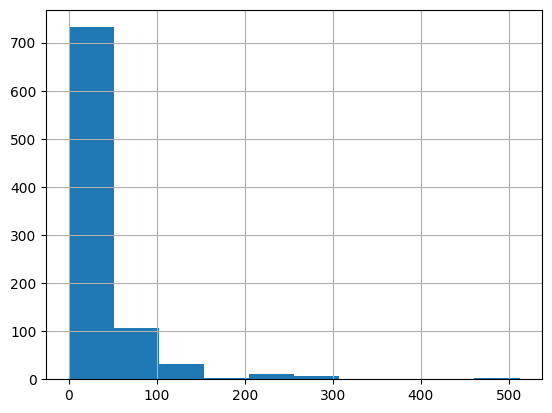

In [60]:
df_titanic["fare"].hist()

In [ ]:
df_titanic["age"].hist()

In [53]:

def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


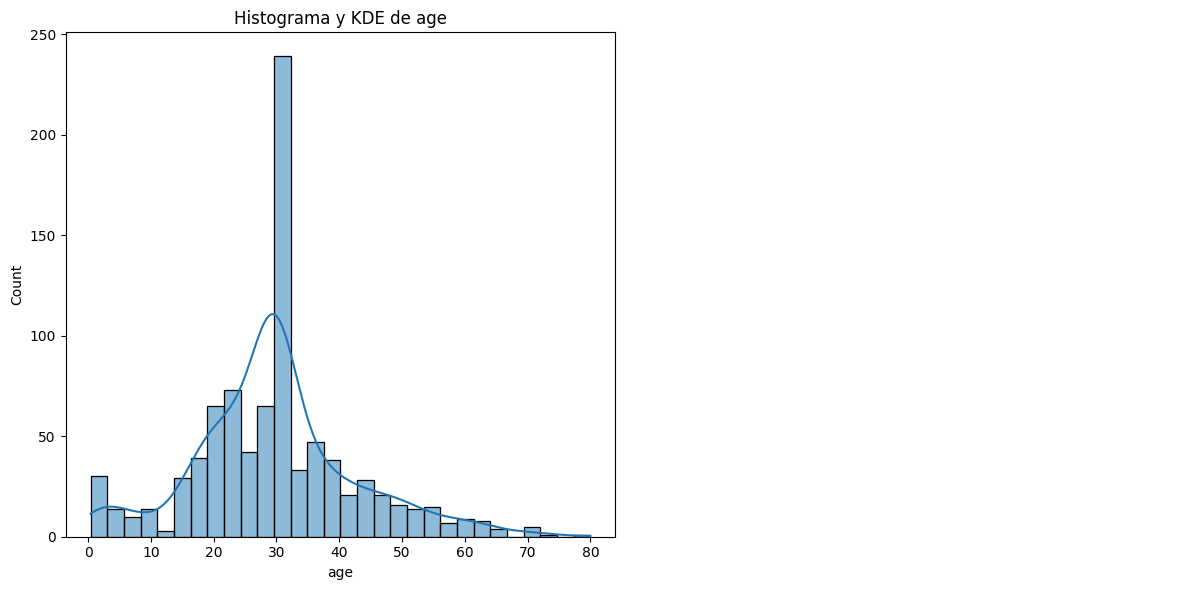

In [ ]:
plot_histo_den(df_titanic,["age"]) #Se tiende a agrupar alrededor de 20-40 años, parece una normal (Gaussian) o binomial

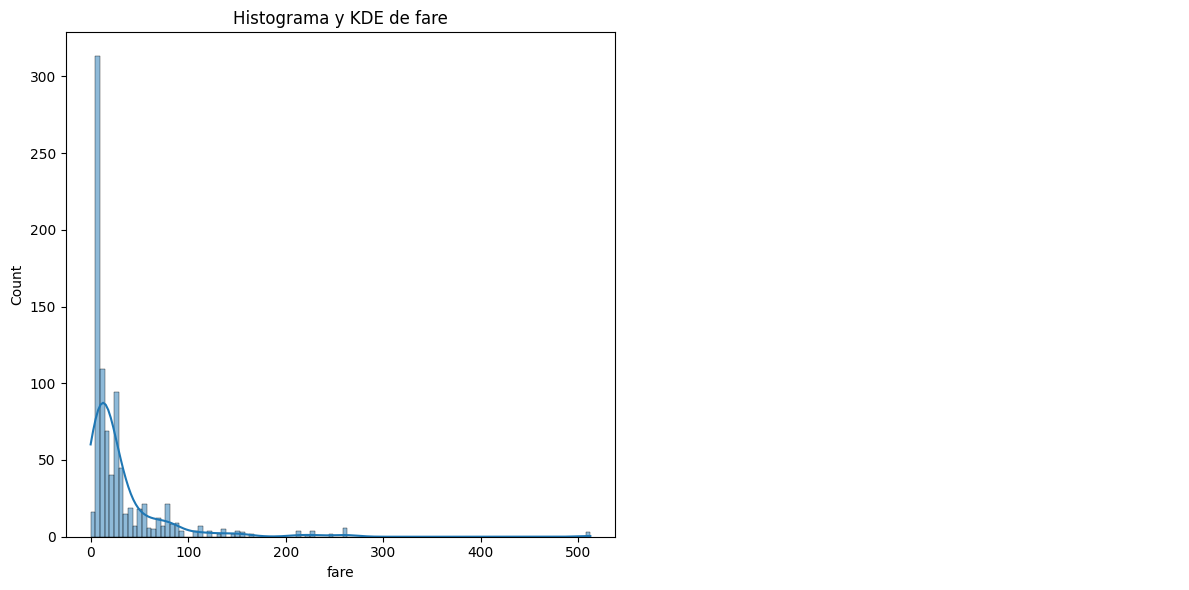

In [ ]:
plot_histo_den(df_titanic,["fare"]) #Parece una logarítimica

In [69]:

def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()


(2,)


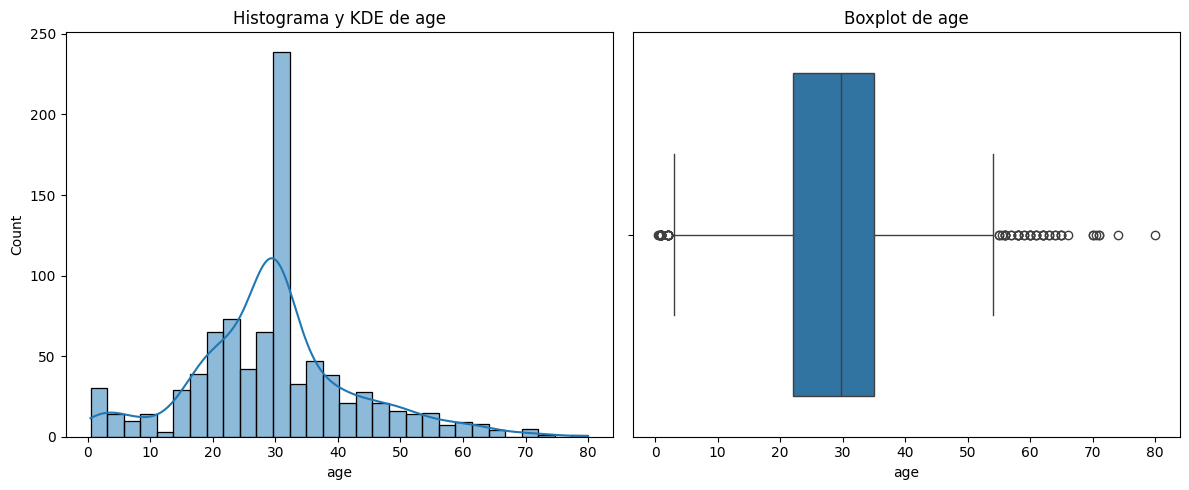

In [ ]:
plot_combined_graphs(df_titanic, ["age"]) #outliers se ven en niños y en gente de mas de 60, probablemente losque iban n el titanic se mudaban ha NYC

(2,)


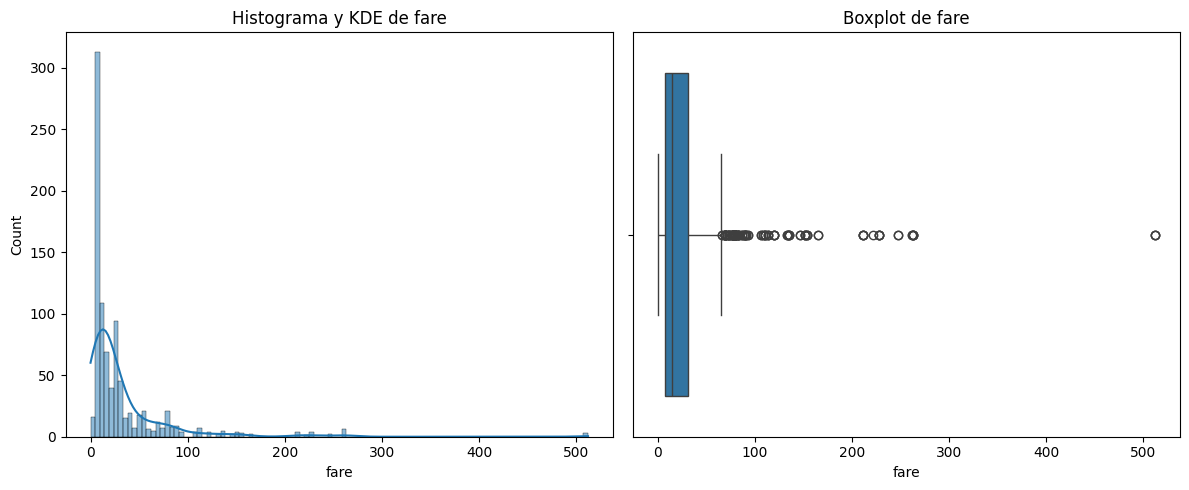

In [ ]:
plot_combined_graphs(df_titanic, ["fare"]) #pareve que lo más común era una persona que se había pagado el oasaje, outliers hay pocos, deberían ser primera clase o familias 

(2,)


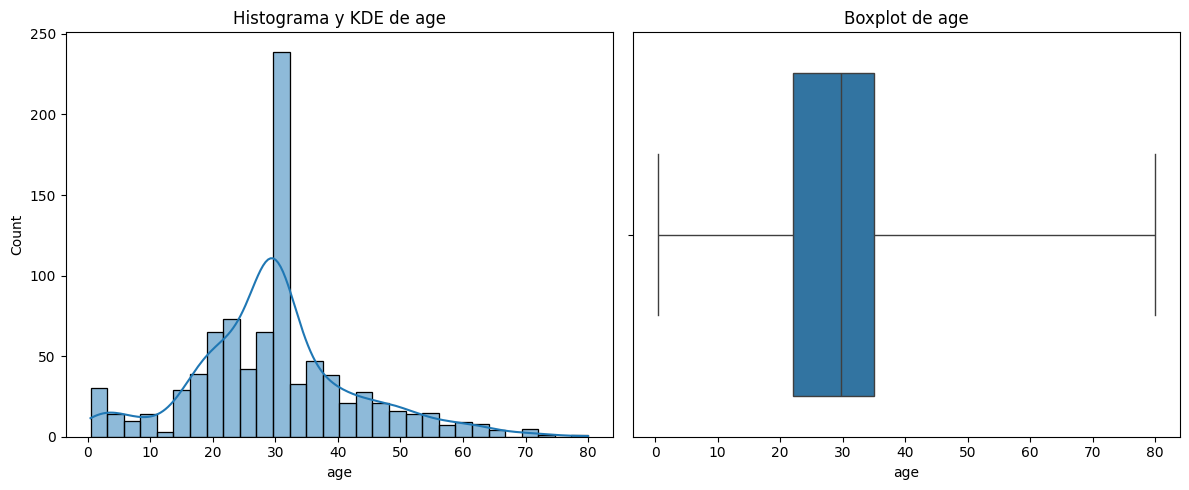

In [ ]:
plot_combined_graphs(df_titanic, ["age"], whisker_width= 4.5) #si que la distribución parece normal

(2,)


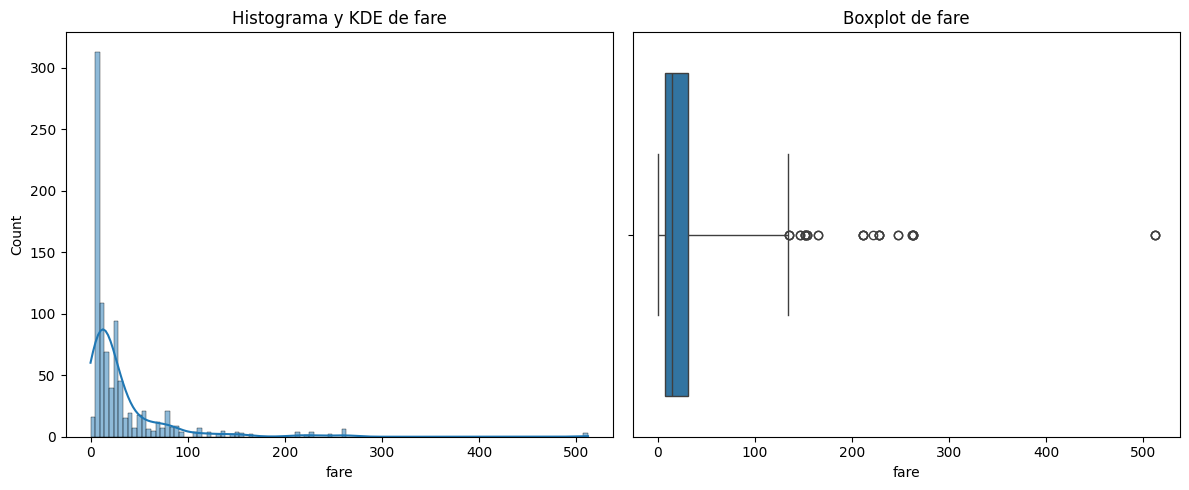

In [ ]:
plot_combined_graphs(df_titanic, ["fare"], whisker_width= 4.5) #Esta no parece uns distribución normal